# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

> Для воспроизводимости результатов

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
# df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
# df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')
df_train = pd.read_csv('datasets/cars_train.csv')
df_test = pd.read_csv('datasets/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [3]:
df_train.sample(30, random_state=42)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   
132          Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000   
6974  Fiat Grande Punto 1.3 Dynamic (Diesel)  2012         450000      70000   
3383                       Maruti Ertiga VDI  2012         550000      67000   
5947                     Mahindra Bolero GLX  2006         200000     120000   
4970                Ford Fiesta 1.4 SXi TDCi  2009         180000     163000   
4260                    Maruti SX4 Zxi BSIII  2010         300000      50000   
5861                    Ford Figo Petrol LXI  2012         290000      25000   
2264                   Tata Safari Storme EX  2015         503000     110000   
1941                        Maruti Swift VXI  2018         550000      24400   
763    Ford Fiesta Classic 1.4 Duratorq CLXI  2012         300000      64000   
5384                Maruti Alto 800 LXI BSIV  2016         275000      38000   
3044              BMW X4 M Sport X xDrive20d  2019        5400000       7500   
6575    Ford EcoSport 1.5 TDCi Titanium BSIV  2017         934000     101000   
101                     Hyundai Verna 1.6 SX  2013         522000     150000   
3626                 Maruti Baleno Alpha 1.3  2018         740000      38817   
1371                        Mahindra Xylo D2  2011         450000      56000   
625                    Honda CR-V 2.4 4WD AT  2007         325000      70000   
3915            Mahindra TUV 300 mHAWK100 T8  2017         725000     100000   
1075                 Maruti Wagon R VXi BSII  2012         225000      80000   
6739               Tata Manza Aura Quadrajet  2010         110000      88000   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   
132   Diesel            Dealer    Automatic   First Owner   13.5 kmpl   
6974  Diesel        Individual       Manual   First Owner   20.3 kmpl   
3383  Diesel        Individual       Manual   First Owner  20.77 kmpl   
5947  Diesel        Individual       Manual  Second Owner         NaN   
4970  Diesel            Dealer       Manual   First Owner         NaN   
4260  Petrol        Individual       Manual   First Owner   15.0 kmpl   
5861  Petrol        Individual       Manual   First Owner   15.6 kmpl   
2264  Diesel        Individual       Manual   First Owner   14.1 kmpl   
1941  Petrol        Individual       Manual   First Owner   22.0 kmpl   
763   Diesel        Individual       Manual  Second Owner   17.8 kmpl   
5384  Petrol            De

In [4]:
df_test.head(5)

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [5]:
df_test.tail(5)

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [6]:
df = pd.concat([df_train, df_test], ignore_index=True)

df.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

> Столбцы с пропусками: 'mileage', 'engine', 'max_power', 'torque', 'seats'

In [7]:
df.duplicated().sum()

1170

> По случайным/верхним/нижним строкам можно получить поверхностное представление о том, как выглядят данные в датасете, есть ли в них какие-то отличительные особенности (обозначения единиц измерения, общий шаблон для какой-либо колонки, тип разделителей и т.д.). <br/> Но по ним нельзя получить полную информацию о данных, включая наличие и количество пропусков, дубликатов, распределение значений и т. д.

> Метода duplicated не достаточно для полного анализа дубликатов. Данный метод не показывает конкретные кластеры дубликатов. Так же он может не найти дубликаты, если значения минимально отличаются (лишний пробел в строке, разница в 0.001 в числавом значении и т. д.)

In [8]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")
profile.to_file("reports/your_report.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 119.39it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [17]:
def fill_by_median(df_train, df_test, column_name):
  train_median = df_train[column_name].median()
  df_train[column_name] = df_train[column_name].fillna(train_median)
  df_test[column_name] = df_test[column_name].fillna(train_median)

columns_with_na = ['mileage', 'engine', 'max_power', 'seats']

for column in columns_with_na:
  fill_by_median(df_train, df_test, column)

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [9]:
X = df_train.drop('selling_price', axis=1)

X.duplicated().sum()

1159

In [10]:
X[X.duplicated()]

name  year  km_driven    fuel  \
254                   Hyundai Grand i10 Sportz  2017      35000  Petrol   
258                           Maruti Swift VXI  2012      50000  Petrol   
268                     Maruti Swift Dzire VXI  2014      70000  Petrol   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017       9000  Diesel   
325                              Lexus ES 300h  2019      20000  Petrol   
...                                        ...   ...        ...     ...   
6947                    Chevrolet Spark 1.0 LS  2010      60000  Petrol   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6989                    Maruti Swift Dzire VDI  2015      50000  Diesel   
6997                           Tata Indigo CR4  2013      25000  Diesel   
6998                           Tata Indigo CR4  2013      25000  Diesel   

     seller_type transmission         owner     mileage   engine   max_power  \
254   Individual       Manual   First Owner   18.9 kmpl  1197 CC      82 bhp   
258   Individual       Manual  Second Owner   18.6 kmpl  1197 CC    85.8 bhp   
268   Individual       Manual  Second Owner   19.1 kmpl  1197 CC    85.8 bhp   
324       Dealer    Automatic   First Owner   13.6 kmpl  1999 CC     177 bhp   
325       Dealer    Automatic   First Owner  22.37 kmpl  2487 CC  214.56 bhp   
...          ...          ...           ...         ...      ...         ...   
6947  Individual       Manual  Second Owner   18.0 kmpl   995 CC      62 bhp   
6984  Individual       Manual   First Owner   24.4 kmpl  1498 CC   98.63 bhp   
6989  Individual       Manual   First Owner  26.59 kmpl  1248 CC      74 bhp   
6997  Individual       Manual   First Owner  23.57 kmpl  1396 CC      70 bhp   
6998  Individual       Manual   First Owner  23.57 kmpl  1396 CC      70 bhp   

                   torque  seats  
254        114Nm@ 4000rpm    5.0  
258        114Nm@ 4000rpm    5.0  
268        114Nm@ 4000rpm    5.0  
324   430Nm@ 1750-2500rpm    5.0  
325   202Nm@ 3600-5200rpm    5.0  
...                   ...    ...  
6947      90.3Nm@ 4200rpm    5.0  
6984  215Nm@ 1750-3000rpm    5.0  
6989       190Nm@ 2000rpm    5.0  
6997  140Nm@ 1800-3000rpm    5.0  
6998  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 12 columns]

In [11]:
cols = [c for c in df.columns if c != "selling_price"]
df_train = df_train.drop_duplicates(subset=cols, keep="first").reset_index(drop=True)

In [12]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [13]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [14]:
def clean_unit(df, column_name, unit):
  column = df[column_name].astype("string").str.replace(f" {unit}", "")
  df[column_name] = pd.to_numeric(column, errors="coerce")

columns = [('mileage', 'kmpl'), ('engine', 'CC'), ('max_power', 'bhp')]

for column_name, unit in columns:
  clean_unit(df_train, column_name, unit)
  clean_unit(df_test, column_name, unit)

df_train.drop('torque', axis=1, inplace=True)
df_test.drop('torque', axis=1, inplace=True)


In [15]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  seats  
0  Individual       Manual   First Owner     23.4    1248       74.0    5.0  
1  Individual       Manual  Second Owner    21.14    1498     103.52    5.0  
2  Individual       Manual   First Owner     23.0    1396       90.0    5.0  
3  Individual       Manual   First Owner     16.1    1298       88.2    5.0  
4  Individual       Manual   First Owner    20.14    1197      81.86    5.0

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5577 non-null   Float64
 9   engine         5654 non-null   Int64  
 10  max_power      5656 non-null   Float64
 11  seats          5654 non-null   float64
dtypes: Float64(2), Int64(1), float64(1), int64(3), object(5)
memory usage: 564.7+ KB


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [18]:
df_train['engine'] = df_train['engine'].astype('int')
df_train['seats'] = df_train['seats'].astype('int')

df_test['engine'] = df_test['engine'].astype('int')
df_test['seats'] = df_test['seats'].astype('int')

In [19]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          Float64
engine             int64
max_power        Float64
seats              int64
dtype: object

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [20]:
display(df_train.select_dtypes(include="number").describe())
display(df_test.select_dtypes(include="number").describe())

display(df_train.select_dtypes(exclude="number").describe(include="object"))
display(df_test.select_dtypes(exclude="number").describe(include="object"))

year  selling_price     km_driven    mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03     5840.0  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04  19.394733  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04   3.919005   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00        0.0   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04       17.0  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04       19.3  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05      22.07  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06       42.0  3604.000000   

       max_power        seats  
count     5840.0  5840.000000  
mean   87.906371     5.426712  
std    31.640418     0.982344  
min          0.0     2.000000  
25%         68.0     5.000000  
50%        81.86     5.000000  
75%         99.0     5.000000  
max        400.0    14.000000

year  selling_price      km_driven   mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000    1000.0  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000  19.32419  1454.87600   
std       4.012149   7.585539e+05   48486.218662  3.911901   521.99574   
min    1995.000000   3.100000e+04    1303.000000       0.0   624.00000   
25%    2011.000000   2.500000e+05   37000.000000   16.5875  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000      19.3  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000      22.3  1582.00000   
max    2020.000000   6.000000e+06  375000.000000      28.4  3604.00000   

       max_power        seats  
count     1000.0  1000.000000  
mean    90.84167     5.403000  
std    34.893389     0.912921  
min         34.2     4.000000  
25%         69.0     5.000000  
50%       82.425     5.000000  
75%        102.0     5.000000  
max        280.0     9.000000

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

> В `km_driven` в трэине есть выбросы (max - 2.360457e+06). D 'max_power' min - 0, что выглядит либо как ошибка, либо как пропуски, заполненные нулями (хотя лучше пропуски заполнять NaN значениями). В `selling_price` есть выбросы (сильно выбивающиеся по цене машины), т. к.

> В категориальных признаках, как и ожидалось, наибольшее разнообразие у `name`.

In [21]:
# Тут изначально было так, но мы же в 3 задании удаляли столбец `torque`, так что я поправил кол-во колонок на 12
# assert df_train.shape == (5840, 13)

assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

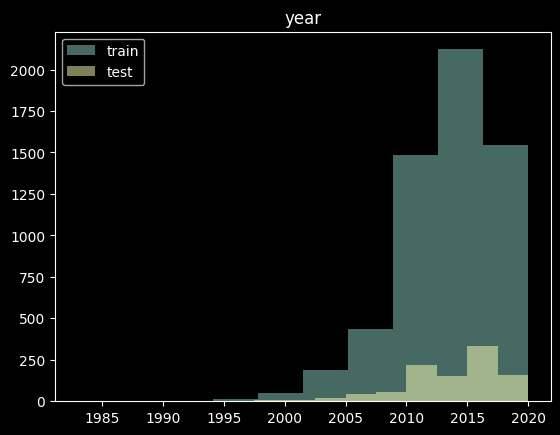

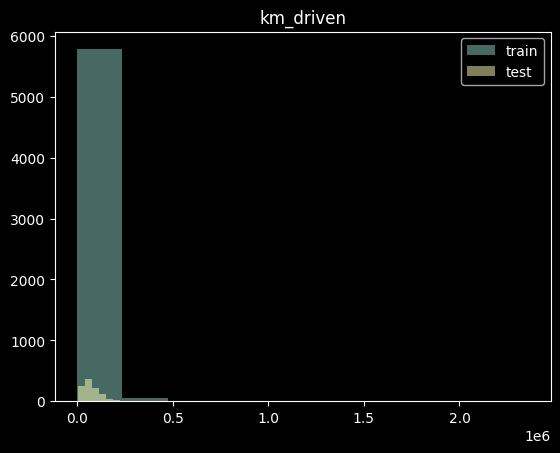

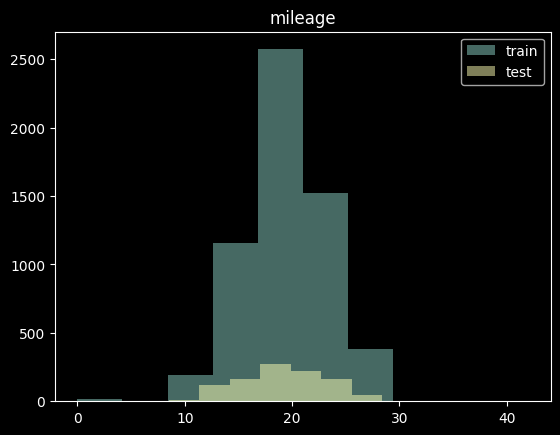

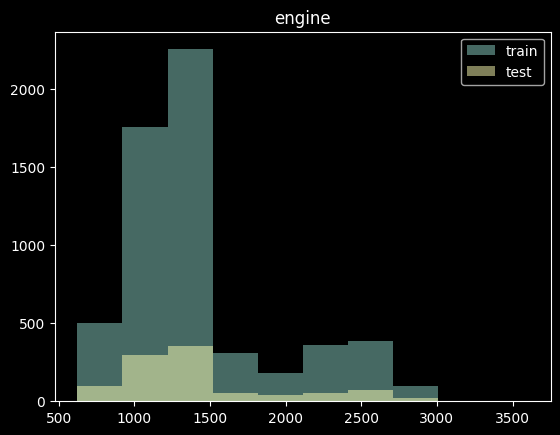

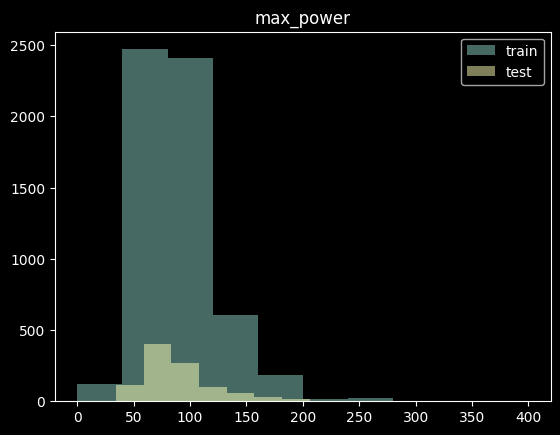

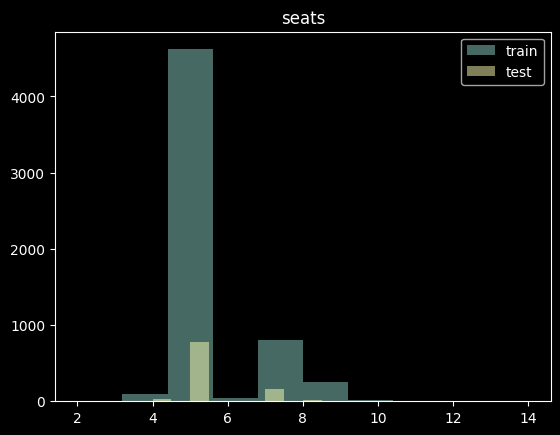

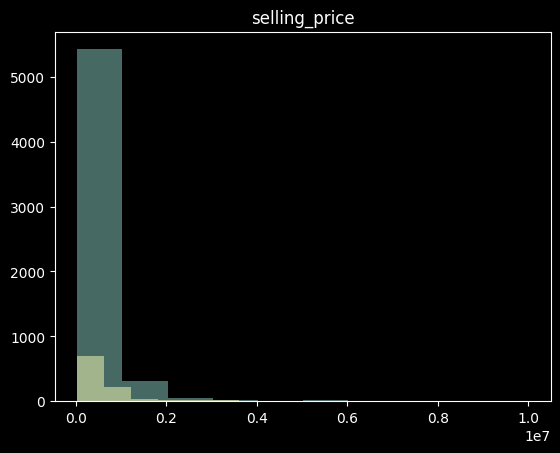

In [22]:
plt.hist(df_train["year"], label="train", alpha=0.5)
plt.hist(df_test["year"], label="test", alpha=0.5)
plt.title("year")
plt.legend()
plt.show()

plt.hist(df_train["km_driven"], label="train", alpha=0.5)
plt.hist(df_test["km_driven"], label="test", alpha=0.5)
plt.title("km_driven")
plt.legend()
plt.show()

plt.hist(df_train["mileage"], label="train", alpha=0.5)
plt.hist(df_test["mileage"], label="test", alpha=0.5)
plt.title("mileage")
plt.legend()
plt.show()

plt.hist(df_train["engine"], label="train", alpha=0.5)
plt.hist(df_test["engine"], label="test", alpha=0.5)
plt.title("engine")
plt.legend()
plt.show()

plt.hist(df_train["max_power"], label="train", alpha=0.5)
plt.hist(df_test["max_power"], label="test", alpha=0.5)
plt.title("max_power")
plt.legend()
plt.show()

plt.hist(df_train["seats"], label="train", alpha=0.5)
plt.hist(df_test["seats"], label="test", alpha=0.5)
plt.title("seats")
plt.legend()
plt.show()

plt.hist(df_train["selling_price"], label="train", alpha=0.5)
plt.hist(df_test["selling_price"], label="test", alpha=0.5)
plt.title("selling_price")
plt.show()

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

/Users/yuga/Projects/Python/HSE_Ml/HMW_1/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuga/Projects/Python/HSE_Ml/HMW_1/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuga/Projects/Python/HSE_Ml/HMW_1/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuga/Projects/Python/HSE_Ml/HMW_1/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: F

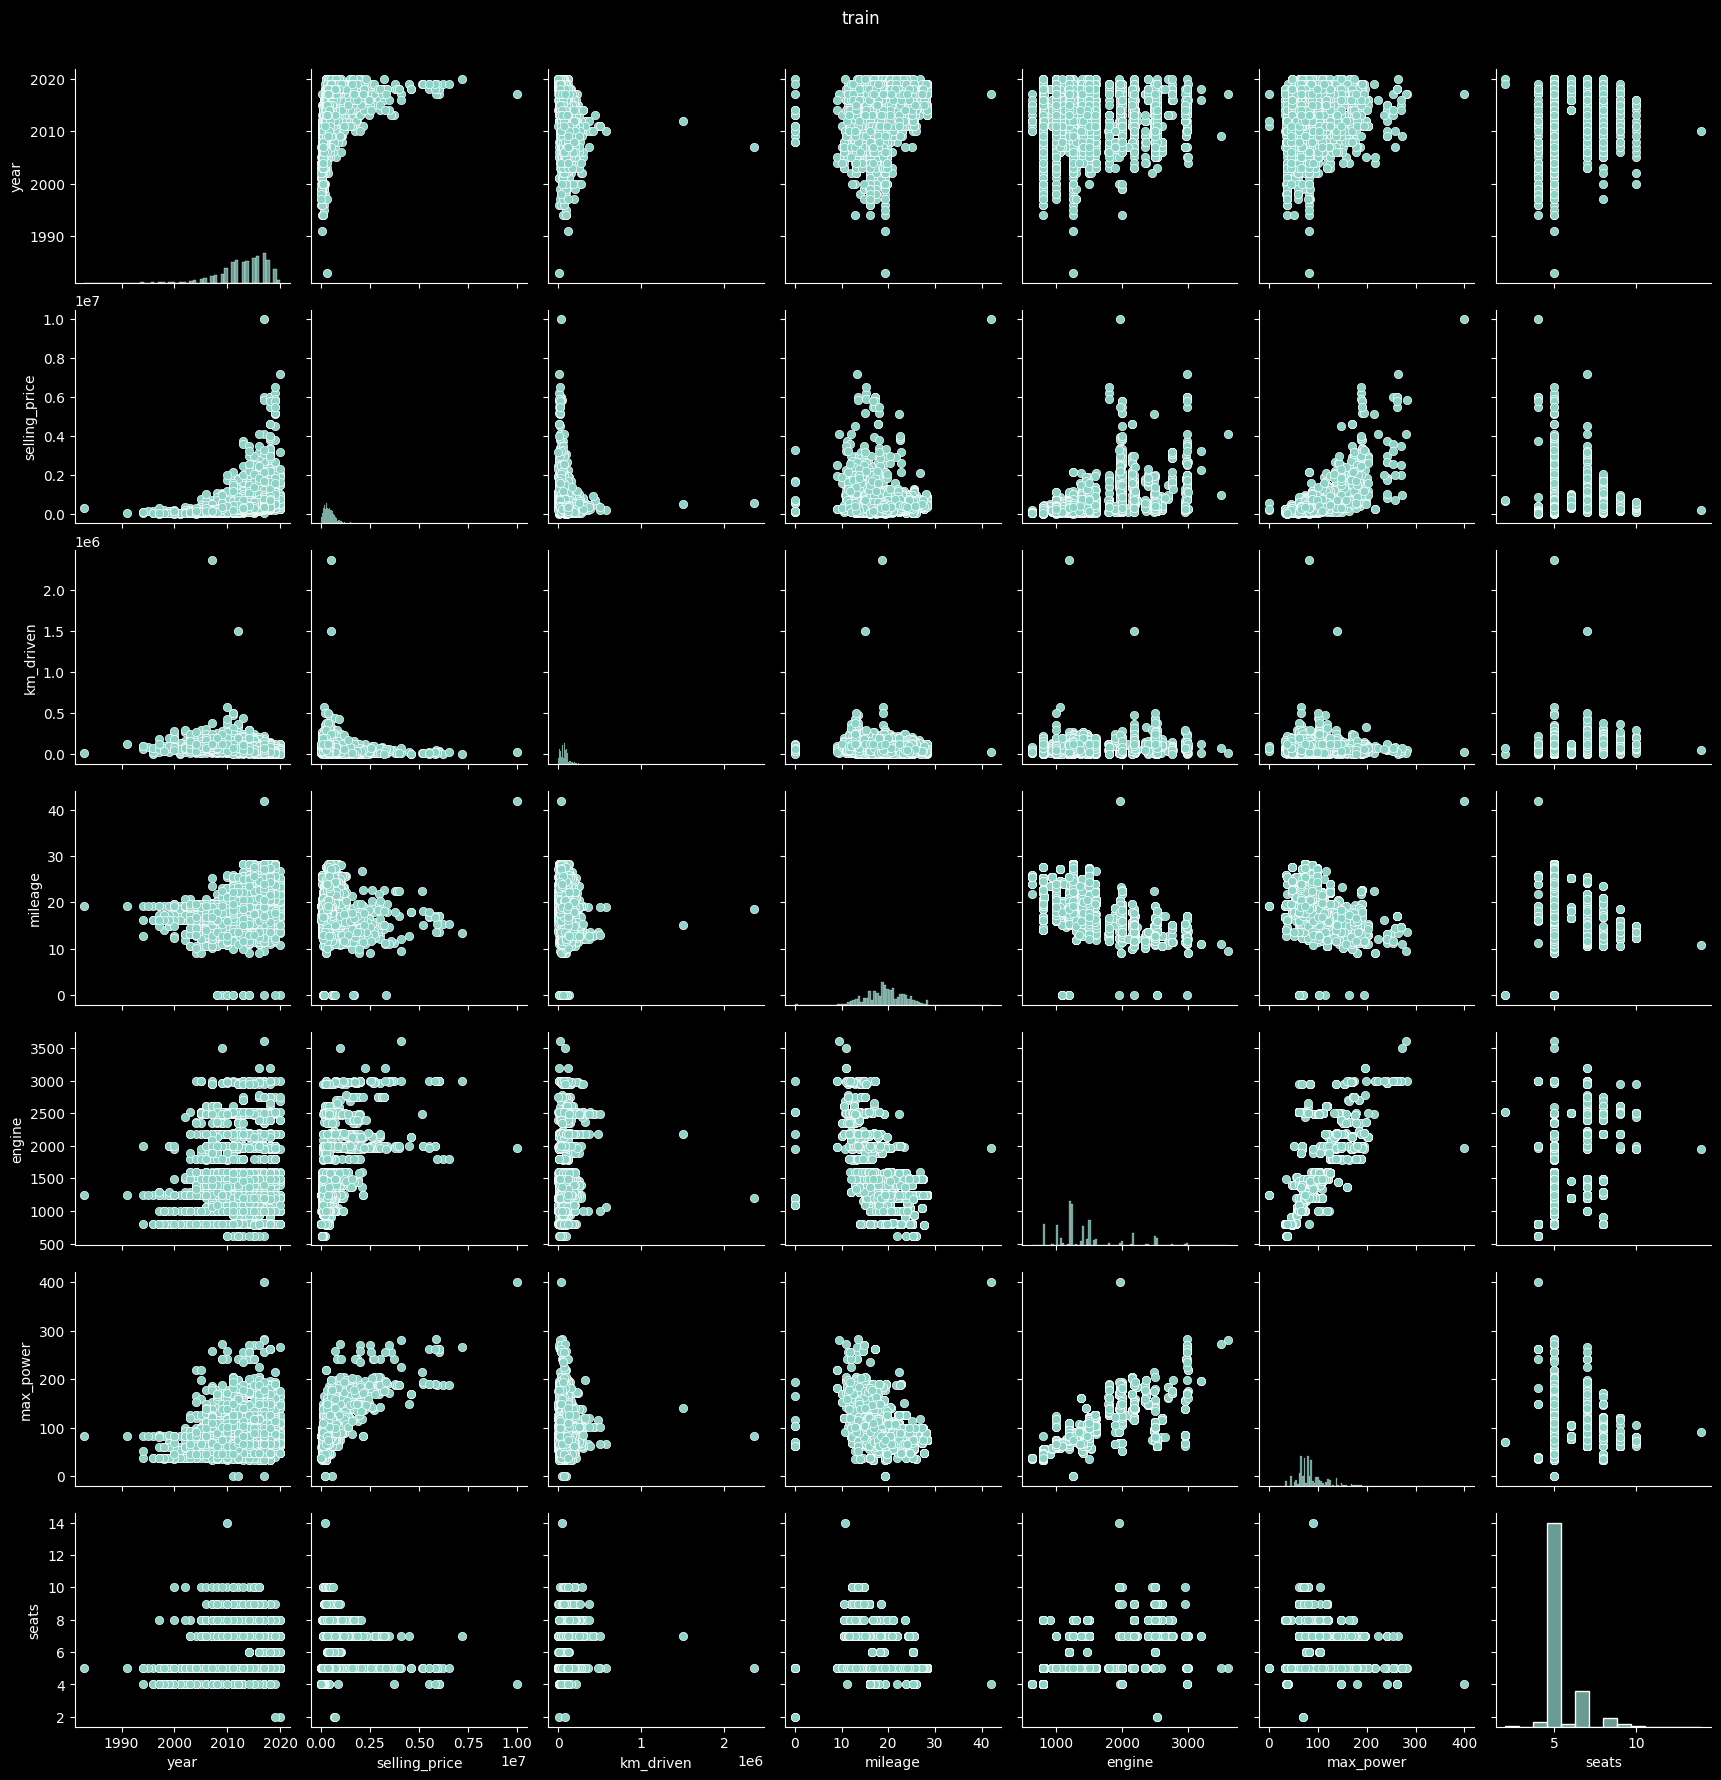

In [23]:
sns.pairplot(df_train)
plt.suptitle("train", y=1.02)
plt.show()

/Users/yuga/Projects/Python/HSE_Ml/HMW_1/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuga/Projects/Python/HSE_Ml/HMW_1/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuga/Projects/Python/HSE_Ml/HMW_1/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuga/Projects/Python/HSE_Ml/HMW_1/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: F

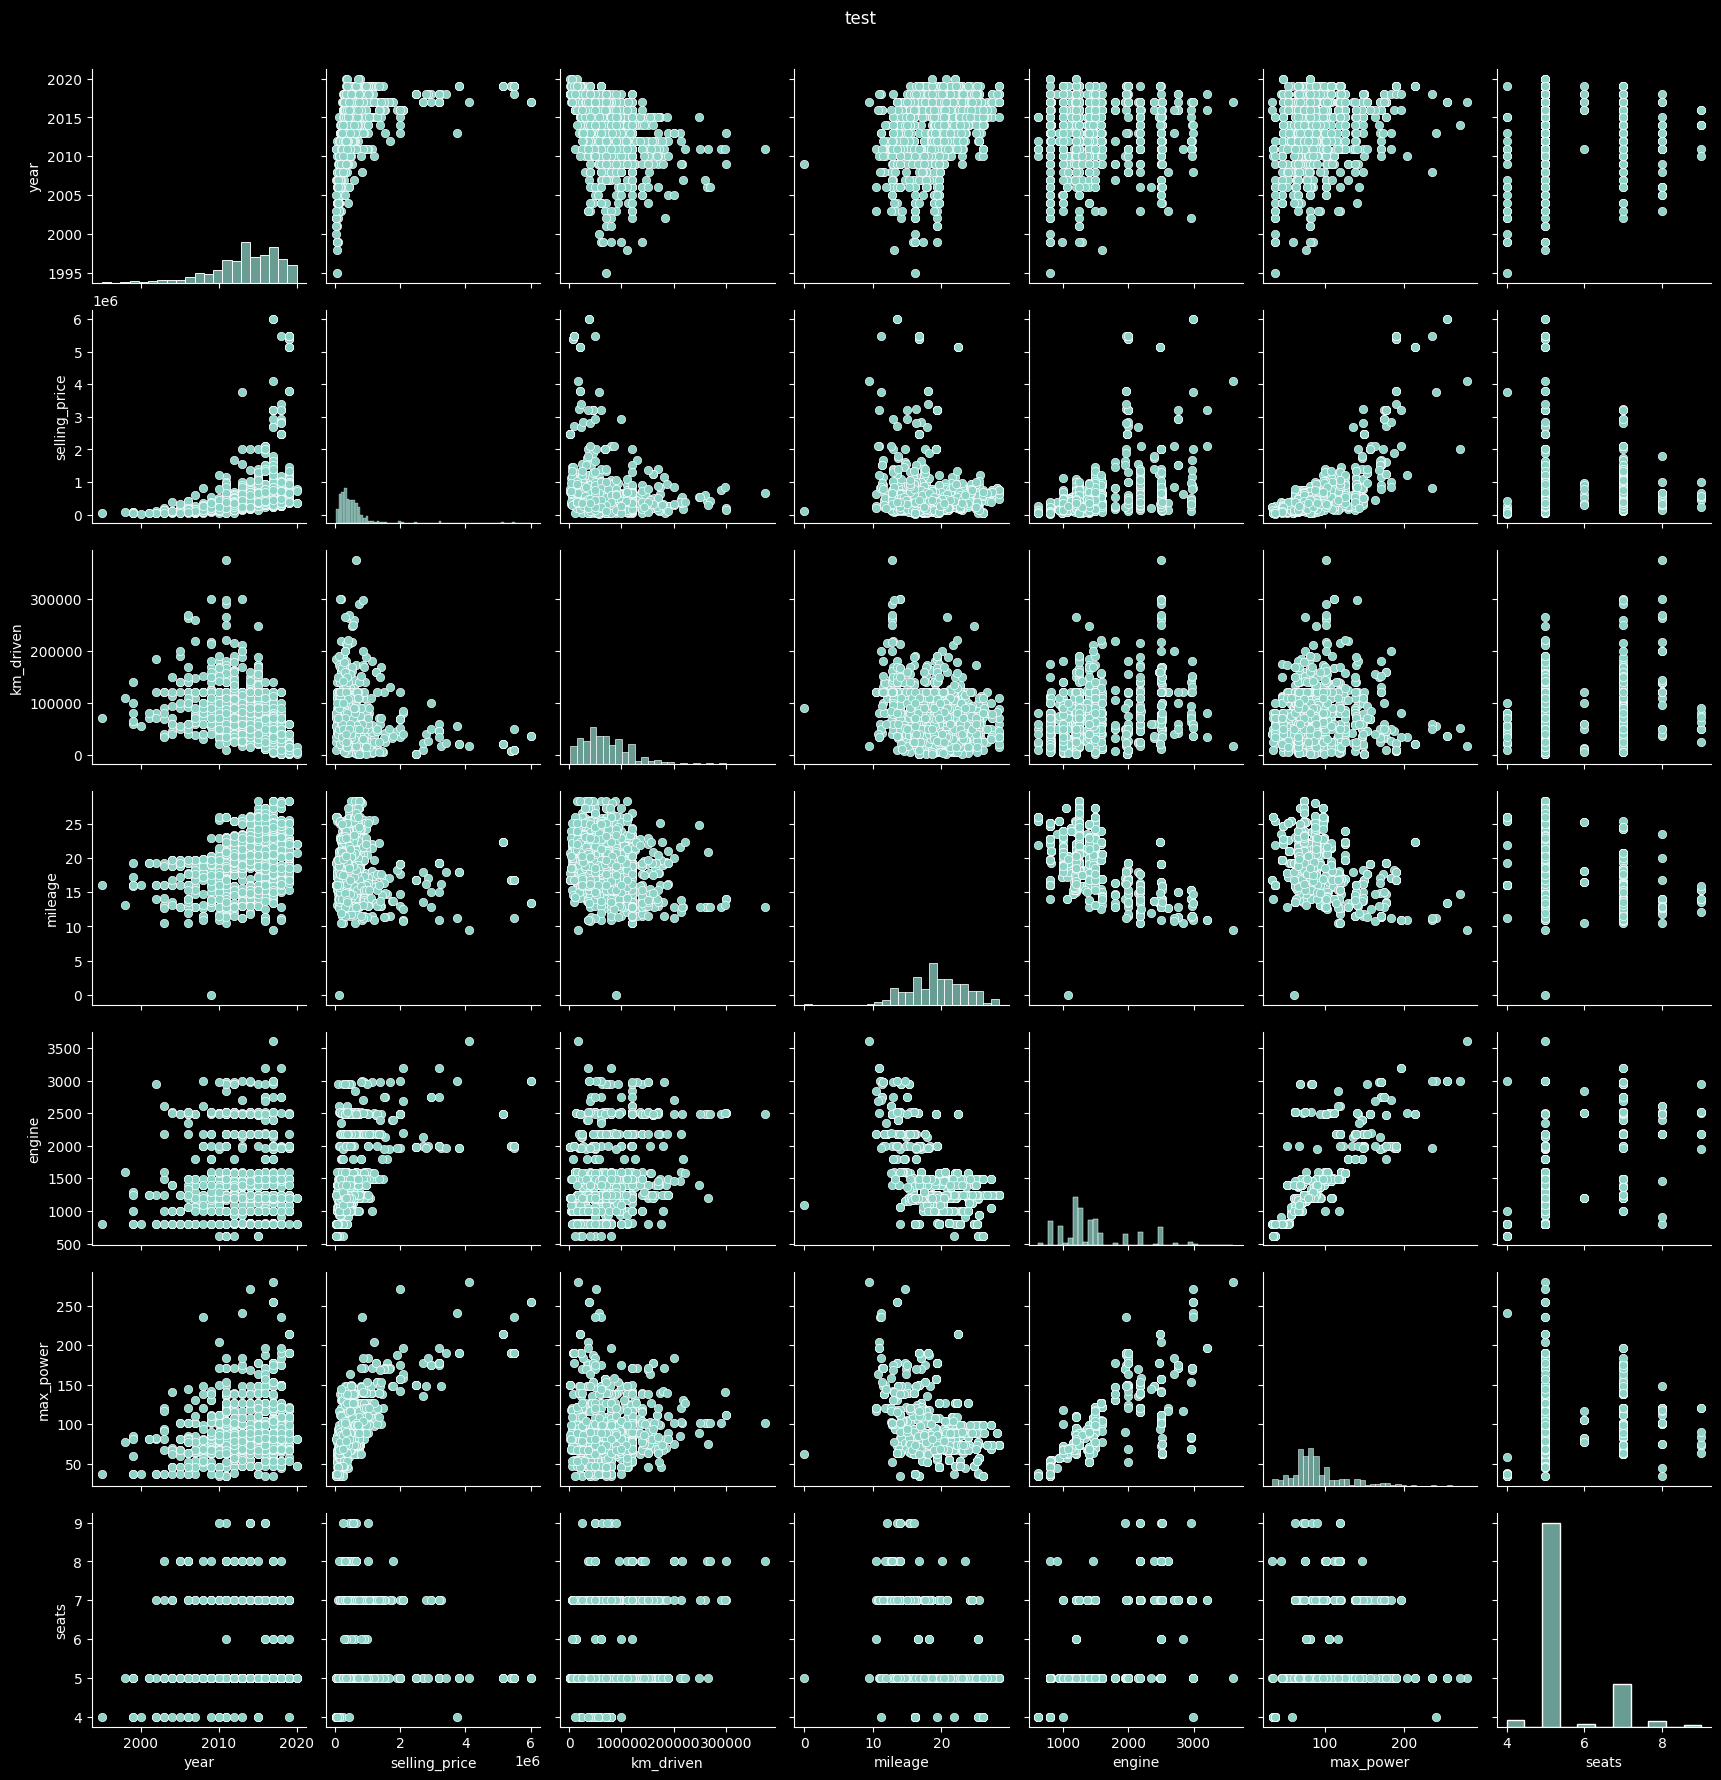

In [24]:
sns.pairplot(df_test)
plt.suptitle("test", y=1.02)
plt.show()

> Да, на основе распределений хорошо можно увидеть связь признаков `year`, `km_driven` и частично `max_power`.

> На основе распределений можно выдвинуть гипотезу о корреляции между `max_power` и `engine`, и между `max_power` и `selling_price`.

> Распределения на трэине и тесте оказались похожими, хоть и не идентичными.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


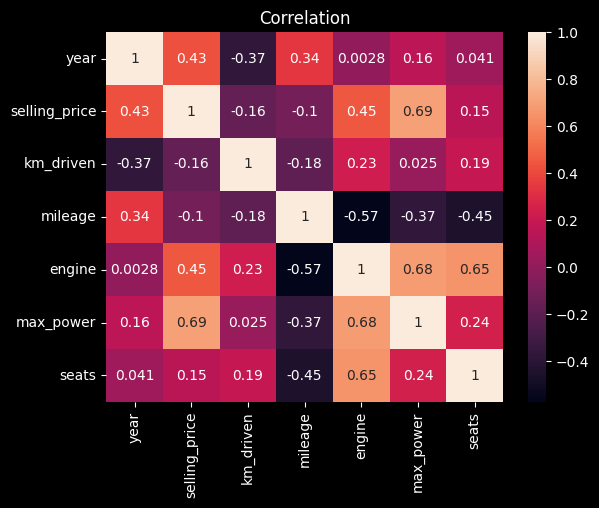

In [25]:
corr = df_train.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

> Меньше всего между собой скоррелированы признаки `engine` и `year`.

> Довольно сильная положительная линейная зависимость наблюдается между: <br/> `max_power` и `engine` <br/> `max_power` и `selling_price` <br/> `seats` и `engine`

> Да, корреляция между `year` и `km_driven` отрицательная, соответственно, чем меньше год, тем, скорее всего, больше километров проехала машина.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

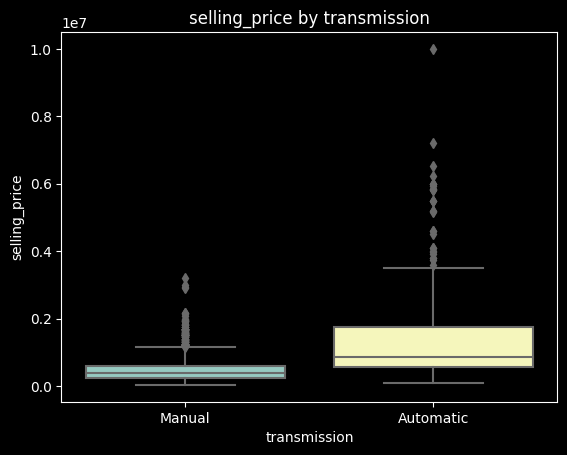

In [26]:
tmp = df_train.copy()

sns.boxplot(data=tmp, x="transmission", y="selling_price")
plt.title("selling_price by transmission")
plt.xlabel("transmission")
plt.ylabel("selling_price")
plt.show()

> Можно заметить, что машины на автомате стоят в среднем дороже и разброс цены у них больше, чем у машин на механике. Так же можно увидеть, что у автоматики больше выбросов.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   Float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   Float64
 11  seats          5840 non-null   int64  
dtypes: Float64(2), int64(5), object(5)
memory usage: 559.0+ KB


In [28]:
real_columns = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

In [29]:
y_train = df_train['selling_price'].copy()
X_train = df_train[real_columns].copy()

> year — год выпуск <br/> km_driven — пробег в километрах <br/> mileage — экономичность (км на литр топлива) <br/> engine — объём двигателя <br/> max_power — максимальная мощность <br/> seats — число мест <br/> <br/> selling_price — цена продажи (целевая переменная)


In [30]:
y_test = df_test['selling_price'].copy()
X_test = df_test[real_columns].copy()

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

y_pred_train = linear_regression.predict(X_train)
y_pred_test = linear_regression.predict(X_test)

print("R2 train:", r2_score(y_train, y_pred_train))
print("R2 test: ", r2_score(y_test,  y_pred_test))

print("MSE train:", MSE(y_train, y_pred_train))
print("MSE test: ", MSE(y_test,  y_pred_test))


R2 train: 0.5922032894671212
R2 test:  0.594041620063662
MSE train: 116890171494.95644
MSE test:  233356469188.12802


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [33]:
linear_regression.fit(X_train, y_train)

y_pred_train = linear_regression.predict(X_train)
y_pred_test = linear_regression.predict(X_test)

print("R2 train:", r2_score(y_train, y_pred_train))
print("R2 test: ", r2_score(y_test,  y_pred_test))

print("MSE train:", MSE(y_train, y_pred_train))
print("MSE test: ", MSE(y_test,  y_pred_test))

R2 train: 0.5922032894671239
R2 test:  0.5940416200636769
MSE train: 116890171494.95567
MSE test:  233356469188.11945


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [34]:
coefs = pd.Series(linear_regression.coef_, index=X_train.columns).abs().sort_values(ascending=False)
coefs

max_power    322451.388977
year         153105.372446
engine        61210.921548
km_driven     44121.753896
mileage       28256.749571
seats         23378.299004
dtype: float64

In [35]:
print(f'Самым информативным признаком оказался {coefs.index[0]} со значением по модулю {coefs.iloc[0]}')

Самым информативным признаком оказался max_power со значением по модулю 322451.3889774048


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train, y_train)

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

print("R2 train:", r2_score(y_train, y_pred_train))
print("R2 test: ", r2_score(y_test,  y_pred_test))

print("MSE train:", MSE(y_train, y_pred_train))
print("MSE test: ", MSE(y_test,  y_pred_test))

R2 train: 0.5922032894318554
R2 test:  0.5940404582176078
MSE train: 116890171505.06494
MSE test:  233357137050.41724


In [37]:
pd.Series(lasso.coef_, index=X_train.columns).abs().sort_values(ascending=False)

max_power    322452.288882
year         153105.184414
engine        61206.078165
km_driven     44120.625070
mileage       28254.867715
seats         23375.421232
dtype: float64

> L1-регуляризация не занулила никакие веса. Предположу, что это связано с тем, что нет весов, близких к 0 (т. е. они все вносят свой ощутимый вклад).

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [38]:
from sklearn.model_selection import GridSearchCV

lasso_for_grid = Lasso()

param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}

lasso_grid_search = GridSearchCV(estimator=lasso_for_grid, param_grid=param_grid, cv=10)

lasso_grid_search.fit(X_train, y_train)

print(f"Лучший коэффициент регуляризации: {lasso_grid_search.best_params_['alpha']}")

best_model = lasso_grid_search.best_estimator_

pd.Series(best_model.coef_, index=X_train.columns).abs().sort_values(ascending=False)

Лучший коэффициент регуляризации: 10000


max_power    329117.961226
year         152057.154447
km_driven     32691.362332
engine        17588.723817
mileage        8718.561544
seats             0.000000
dtype: float64

> Грид-сёрч обучил 81 модель (8 гиперпараметров * 10 фолдов + 1 refit = 81) <br/>
> Коэффициент регуляризации у лучшей из перебранных моделей - 10000 <br/>
> Занулился вес у `seats`

In [39]:
y_pred_train = lasso_grid_search.predict(X_train)
y_pred_test = lasso_grid_search.predict(X_test)

print("R2 train:", r2_score(y_train, y_pred_train))
print("R2 test: ", r2_score(y_test,  y_pred_test))

print("MSE train:", MSE(y_train, y_pred_train))
print("MSE test: ", MSE(y_test,  y_pred_test))

R2 train: 0.5891802492556081
R2 test:  0.5815233235128243
MSE train: 117756690717.97363
MSE test:  240552343513.4998


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [40]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()

param_grid={
    'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
}

elastic_net_grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=10)

elastic_net_grid_search.fit(X_train, y_train)

print(f"Лучший гиперпараметры: {elastic_net_grid_search.best_params_}")

best_model = elastic_net_grid_search.best_estimator_

Лучший гиперпараметры: {'alpha': 1, 'l1_ratio': 0.9}


> Грид-сёрч обучил 481 модель (8 alpha * 6 l1 * 10 фолдов + 1 refit = 481) <br/>
> Лучшие гиперпараметры:
> - Коэффициент регуляризации - 1
> - L1-ratio - 0.9

In [41]:
y_pred_train = elastic_net_grid_search.predict(X_train)
y_pred_test = elastic_net_grid_search.predict(X_test)

print("R2 train:", r2_score(y_train, y_pred_train))
print("R2 test: ", r2_score(y_test,  y_pred_test))

print("MSE train:", MSE(y_train, y_pred_train))
print("MSE test: ", MSE(y_test,  y_pred_test))

R2 train: 0.5883107692906611
R2 test:  0.5721492412406726
MSE train: 118005917010.36154
MSE test:  245940833686.43668


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [42]:
X_train_cat = df_train.drop('name', axis=1).copy()
X_test_cat = df_test.drop('name', axis=1).copy()

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [ ]:
assert X_train_cat.shape == (5840, 10)

In [ ]:
X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [44]:
from sklearn.preprocessing import OneHotEncoder

cats_cols = X_train_cat.select_dtypes(include="object").columns.tolist() + ["seats"]

X_train_tmp = X_train_cat[cats_cols].copy()
X_test_tmp = X_test_cat[cats_cols].copy()

ohe = OneHotEncoder(drop="first")

X_train_transformed = ohe.fit_transform(X_train_tmp)
X_test_transformed = ohe.transform(X_test_tmp)

X_train_cat_ohe = pd.DataFrame.sparse.from_spmatrix(
    X_train_transformed,
    index=X_train_tmp.index,
    columns=ohe.get_feature_names_out(cats_cols),
)

X_test_cat_ohe = pd.DataFrame.sparse.from_spmatrix(
    X_test_transformed,
    index=X_test_tmp.index,
    columns=ohe.get_feature_names_out(cats_cols),
)

X_train_ohe = pd.concat([X_train.drop('seats', axis=1), X_train_cat_ohe], axis=1)
X_test_ohe = pd.concat([X_test.drop('seats', axis=1), X_test_cat_ohe], axis=1)


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [45]:
# Чтобы особо не возиться с решением перевода sparse типа просто выключил ворнинги
import warnings

warnings.filterwarnings(
    "ignore",
    message="pandas.DataFrame with sparse columns found.*",
    category=UserWarning,
)

In [46]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

param_grid={
    'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
}

ridge_grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=10)

ridge_grid_search.fit(X_train_ohe, y_train)

print(f"Лучший гиперпараметры: {ridge_grid_search.best_params_}")

best_model = ridge_grid_search.best_estimator_

Лучший гиперпараметры: {'alpha': 10}


In [47]:
y_pred_train = ridge_grid_search.predict(X_train_ohe)
y_pred_test = ridge_grid_search.predict(X_test_ohe)

print("R2 train:", r2_score(y_train, y_pred_train))
print("R2 test: ", r2_score(y_test,  y_pred_test))

print("MSE train:", MSE(y_train, y_pred_train))
print("MSE test: ", MSE(y_test,  y_pred_test))

R2 train: 0.6538888262740474
R2 test:  0.6455148500941645
MSE train: 99208731723.90483
MSE test:  203768186715.64886


> Качество прогнозов удалось увеличить в среднем на 5-6 единиц по R2 метрике

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [48]:
def business_metric(y_true, y_pred):
    return ((y_true - y_pred).abs() < (y_true / 10)).astype(int).sum()/len(y_true)

business_metric(y_test, y_pred_test)

0.242

In [49]:
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [51]:
models = {
    "LinearRegression": linear_regression,
    "Lasso (GridSearchCV)": lasso_grid_search,
    "ElasticNet (GridSearchCV)": elastic_net_grid_search,
    "Ridge (GridSearchCV)": ridge_grid_search,
}

max_business_metric = 0
best_model = ''

for name, model in models.items():
    model.fit(X_train_ohe, y_train)
    pred = model.predict(X_test_ohe)
    
    calculated_business_metric = business_metric(y_test, pred)

    if calculated_business_metric > max_business_metric:
        max_business_metric = calculated_business_metric
        best_model = name

    print(f"Модель {name}. Значение бизнесс метрики: {calculated_business_metric}")

print()
print(f"Лучшая модель: {best_model}. Значение бизнесс метрики: {max_business_metric}")

Модель LinearRegression. Значение бизнесс метрики: 0.249
Модель Lasso (GridSearchCV). Значение бизнесс метрики: 0.23
Модель ElasticNet (GridSearchCV). Значение бизнесс метрики: 0.242
Модель Ridge (GridSearchCV). Значение бизнесс метрики: 0.242

Лучшая модель: LinearRegression. Значение бизнесс метрики: 0.249


> Лучше всех задачу бизнесса решает модель - `LinearRegression`

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

In [52]:
import os
import pickle

model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)

print(f"📁 Директория '{model_dir}' создана или уже существует")

📁 Директория 'models' создана или уже существует


In [53]:
print("💾 Сохраняем модель через Pickle...")
print("-" * 60)

model_path = os.path.join(model_dir, 'linear_regression.pkl')

with open(model_path, 'wb') as f:
    pickle.dump(linear_regression, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"✅ Модель сохранена: {model_path}")
print(f"   Размер файла: {os.path.getsize(model_path) / 1024:.2f} KB")
print(f"   Количество признаков: {linear_regression.n_features_in_}")
print("-" * 60)
print("🎉 Модель успешно сохранена через Pickle!")

feature_names = list(X_train_ohe.columns)
feature_names_path = os.path.join(model_dir, 'feature_names.pkl')

with open(feature_names_path, 'wb') as f:
    pickle.dump(feature_names, f, protocol=4)

print(f"✅ Список признаков сохранен: {feature_names_path}")

💾 Сохраняем модель через Pickle...
------------------------------------------------------------
✅ Модель сохранена: models/linear_regression.pkl
   Размер файла: 1.20 KB
   Количество признаков: 23
------------------------------------------------------------
🎉 Модель успешно сохранена через Pickle!
✅ Список признаков сохранен: models/feature_names.pkl


In [54]:
scaler_path = os.path.join(model_dir, 'scaler.pkl')
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.